## Welcome to my Investigate a Dataset project by:
### Author: Victor M. ADELEYE


# Project: Investigating The Movies Database Collection.
>
>
>
>
>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDB(The Movies Database) is a dataset of details of movies collected to answer question around best feature combinations for ratings, commercial possilities, budget etc. 
>
>At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> The dataset here is a replica of an original version by and with permission from IMDB in accordance to their term of use, replicated by kaggle.
>The dataset has been cleansed for the  benefit of data wrangling and exploratory data analysis practice by the ALX-Udacity trainees of which I (Victor M. ADELEYE) am one.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
#LOADING PACKAGES AND DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#CHECKING THE DATAFRAME
raw = pd.read_csv("tmdb-movies.csv", parse_dates=['release_date'])
raw['release_year']= raw.release_date.dt.year
raw.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09


In [3]:
#CHECKING THE FEATURES OF COLUMNS
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [4]:
#CHECKING ALL COLUMNS
raw.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## Columns and Meaning
    id -                              identification number of each movies
    imdb_id -                         IMDB identification number
    popularity -                      popularity of  movies
    budget                            budjet before inflation
    revenue                           revenue before inflation
    original_title                    title of the movie
    cast                              movie casts
    homepage                          movie website
    director                          movie director
    tagline                           movie taglines
    keywords                          movie keywords
    overview                          summary of movie
    runtime                           runtime of moovie
    genres                            movie genre
    production_companies              name of production company
    release_date                      date of movie release
    vote_count                        number of those who voted for the movie ratings
    vote_average                      average ratings of movies
    release_year                      year of release of movies
    budget_adj                        adjusted budjet according to inflation
    revenue_adj                       adjusted revenue according to effect of inflation

In [5]:
#checking for the total number of duplicates in dataframe
raw.duplicated().sum()

1

In [6]:
#removing the duplicated value
raw.drop_duplicates(inplace=True)

In [7]:
#checking for the null values
raw.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Homepage and tagline are the columns with the highest numbers of null values
* **I will like  to remove homepage, cast, overview, tagline and imdb_id for the main time while dropping the null values**

In [8]:
tmdb_raw = raw[raw.columns.difference(['overview','homepage','tagline', 'cast','imdb_id'])]
tmdb1=tmdb_raw.dropna()

In [9]:
# checking for unique values of each column
tmdb1.nunique()

budget                   501
budget_adj              2465
director                3962
genres                  1790
id                      8691
keywords                8272
original_title          8465
popularity              8665
production_companies    6613
release_date            5290
release_year              56
revenue                 4412
revenue_adj             4531
runtime                  217
vote_average              67
vote_count              1286
dtype: int64

In [10]:
tmdb1.shape

(8691, 16)

### Sorting rated
* sort dataframe with vote count
* realised there were vote counts under 1000.
* set the yardstick of the vote count to at least 1000


In [11]:
tmdb1.sort_values(by='vote_count')

,budget,budget_adj,director,genres,id,keywords,original_title,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,vote_average,vote_count
9177,0,0.000000e+00,Don McKellar,Drama|Science Fiction,16129,y2k|independent film|doomsday,Last Night,0.037178,Cineplex,1998-10-23,1998,0,0.000000e+00,95,6.7,10
9099,0,0.000000e+00,Volker SchlÃ¶ndorff,Mystery|Thriller|Drama|Romance|Crime,30949,sex|scam|cigarette smoking|writer|fake kidnapping,Palmetto,0.328442,Castle Rock Entertainment|Columbia Pictures Co...,1998-02-20,1998,0,0.000000e+00,114,6.1,10
4740,0,0.000000e+00,Yoon-suk Choi|John Kafka,Animation|Adventure|Comedy|Family,136793,time travel|dinosaur,Dino Time,0.227639,Myriad Pictures|CJ Entertainment|Toiion,2012-12-07,2012,0,0.000000e+00,85,5.0,10
9132,0,0.000000e+00,John Henderson,Family|Fantasy,15162,chess|queen|beautiful woman|alternate dimension,Alice Through the Looking Glass,0.216774,IAC Film|Channel 4 Television Corporation|Proj...,1998-12-26,1998,0,0.000000e+00,83,4.7,10
4716,0,0.000000e+00,Atsushi Takeuchi,Animation|Action|Science Fiction,119685,alien|animation|science fiction,Mass Effect: Paragon Lost,0.258942,FUNimation Entertainment|EA International|Bioware,2012-12-28,2012,0,0.000000e+00,84,6.6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,100000000,9.497443e+07,Quentin Tarantino,Drama|Western,68718,bounty hunter|hero|plantation|society|friendship,Django Unchained,5.944518,Columbia Pictures|The Weinstein Company,2012-12-25,2012,425368238,4.039911e+08,165,7.7,7375
2875,185000000,1.873655e+08,Christopher Nolan,Drama|Action|Crime|Thriller,155,dc comics|crime fighter|secret identity|scarec...,The Dark Knight,8.466668,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,2008,1001921825,1.014733e+09,152,8.1,8432
1386,237000000,2.408869e+08,James Cameron,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,Avatar,9.432768,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,2009,2781505847,2.827124e+09,162,7.1,8458
4361,220000000,2.089437e+08,Joss Whedon,Science Fiction|Action|Adventure,24428,new york|shield|marvel comic|comic|superhero,The Avengers,7.637767,Marvel Studios,2012-04-25,2012,1519557910,1.443191e+09,143,7.3,8903


### calculating the profit made on each movie


In [12]:
tmdb1['Profit'] = tmdb1.revenue_adj - tmdb1.budget_adj

<ipython-input-12-815ced981ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb1['Profit'] = tmdb1.revenue_adj - tmdb1.budget_adj


In [13]:
tmdb1.Profit

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10861    0.000000e+00
10862    0.000000e+00
10863    0.000000e+00
10864    0.000000e+00
10865   -1.276423e+05
Name: Profit, Length: 8691, dtype: float64

### While trying to  view ratings, a bias was found out as there were some average votes based on vote_count less than 1000 votes.

In [14]:
# checking for the average vote_count
print(tmdb1.vote_count.mean())

263.5716258198136


#### I decide to filter out vote_count with at least 1000 votes and vote averages  with at least 5.0 rate

In [15]:
high_vote_rating= tmdb1.loc[(tmdb1.vote_count >= 1000) & (tmdb1.vote_average > 5.0)]
high_vote_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 10594
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                561 non-null    int64         
 1   budget_adj            561 non-null    float64       
 2   director              561 non-null    object        
 3   genres                561 non-null    object        
 4   id                    561 non-null    int64         
 5   keywords              561 non-null    object        
 6   original_title        561 non-null    object        
 7   popularity            561 non-null    float64       
 8   production_companies  561 non-null    object        
 9   release_date          561 non-null    datetime64[ns]
 10  release_year          561 non-null    int64         
 11  revenue               561 non-null    int64         
 12  revenue_adj           561 non-null    float64       
 13  runtime           

### Sorting by the popularity

In [16]:
popular = tmdb1.sort_values(by='popularity', ascending=False)

In [17]:
top_pop1000= popular.head(1000)
popular.head(2)

,budget,budget_adj,director,genres,id,keywords,original_title,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,vote_average,vote_count,Profit
0,150000000,137999939.3,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,monster|dna|tyrannosaurus rex|velociraptor|island,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1513528810,1.392446e+09,124,6.5,5562,1.254446e+09
1,150000000,137999939.3,George Miller,Action|Adventure|Science Fiction|Thriller,76341,future|chase|post-apocalyptic|dystopia|australia,Mad Max: Fury Road,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,378436354,3.481613e+08,120,7.1,6185,2.101614e+08


### Expanding the each genre in tor separate columns

In [18]:
# dealing with the grouped genres separated with pipes


for i, genre_grp in enumerate(popular['genres']):
    
    
            print(i, genre_grp) 

0 Action|Adventure|Science Fiction|Thriller
1 Action|Adventure|Science Fiction|Thriller
2 Adventure|Drama|Science Fiction
3 Action|Science Fiction|Adventure
4 Adventure|Science Fiction|Thriller
5 Action|Adventure|Science Fiction
6 Adventure|Action|Science Fiction
7 Action|Thriller
8 Action|Adventure|Science Fiction|Fantasy
9 Science Fiction|Adventure|Thriller
10 Adventure|Fantasy
11 Action|Adventure|Fantasy|Science Fiction
12 Action|Thriller|Science Fiction|Mystery|Adventure
13 Action|Crime|Thriller
14 Western|Drama|Adventure|Thriller
15 Drama
16 Adventure|Family|Animation|Action|Comedy
17 Science Fiction|Action|Thriller|Adventure
18 Adventure|Fantasy|Action
19 Drama|Action|Crime|Thriller
20 History|Drama|Thriller|War
21 Adventure|Fantasy|Action
22 Thriller|Crime
23 Adventure|Fantasy|Family
24 Action|Adventure|Science Fiction
25 Action|Science Fiction
26 Drama|Adventure|Science Fiction
27 Science Fiction|Action|Adventure
28 Family|Animation|Adventure|Comedy
29 Drama|Crime
30 Action|Mys

427 Drama
428 Adventure|Fantasy|Comedy|Family
429 Drama|War
430 Comedy
431 Action|Adventure|Comedy|Family|Fantasy
432 Romance|Drama|Music
433 Drama|Thriller|War
434 Comedy|Romance
435 Romance|Drama
436 Fantasy|Drama|Romance
437 Crime|Thriller
438 Animation|Family
439 Thriller
440 Drama|Fantasy|Horror
441 Science Fiction|Drama
442 Comedy|Romance
443 Comedy|Romance
444 Action|Crime|Fantasy|Science Fiction|Thriller
445 Adventure|Fantasy|Family
446 Drama
447 Adventure|Family|Fantasy
448 Animation|Adventure|Family|Fantasy
449 Adventure|Comedy|Fantasy
450 Adventure|Family|Fantasy
451 Adventure|Animation|Action|Family|Mystery
452 Action|Thriller
453 Action|Thriller
454 Comedy|Drama|Romance
455 Action|Crime
456 Action|Science Fiction
457 Animation|Family|Adventure|Science Fiction
458 Family|Animation
459 Science Fiction|Horror|Action
460 Action|Comedy|Crime|Thriller
461 Romance|Comedy
462 Drama|Comedy|War
463 Romance|Comedy
464 Science Fiction|Thriller|Mystery
465 Adventure|Science Fiction
466

747 Adventure|Drama|Romance|Action
748 Action|Adventure|Thriller|Science Fiction
749 Adventure|Action|Thriller|Science Fiction
750 Fantasy|Action|Comedy|Crime
751 Drama|Crime
752 Action|Animation
753 Comedy|Romance
754 Animation|Family
755 Comedy|Drama
756 Drama|History|Music
757 Action|Comedy|Crime|Thriller
758 Fantasy|Drama
759 Animation|Comedy|Family
760 Adventure|Fantasy|Comedy|Family
761 Adventure|Action|Comedy
762 Action|Drama|Science Fiction
763 Comedy|Drama|Romance
764 Comedy
765 Animation|Action|Science Fiction
766 Thriller|Romance
767 Action|Science Fiction
768 Animation|Family|Adventure|Comedy
769 Animation|Adventure|Family|Fantasy
770 Comedy|Family
771 Thriller
772 Crime|Drama|Mystery|Thriller
773 Adventure|Fantasy|Family
774 Animation|Family
775 Drama
776 Science Fiction
777 Drama
778 Animation|Comedy|Family
779 Comedy
780 Drama|Romance
781 Thriller|Action
782 Drama|Comedy|Romance
783 Comedy|Romance|Family
784 Action|Adventure|Comedy|Family
785 Action|Science Fiction|Thril

1069 Horror|Action|Thriller|Crime
1070 Thriller|Action|Drama
1071 Drama|Comedy
1072 Comedy
1073 Action|Thriller|Science Fiction
1074 Crime|Drama
1075 Adventure|Science Fiction|Action
1076 Action|Science Fiction|Thriller|Crime
1077 Comedy|Family|Science Fiction
1078 Family|Animation|Adventure|Comedy
1079 Mystery|Thriller|Fantasy|Horror|Drama
1080 Crime|Drama|Thriller
1081 Action|Fantasy|Horror|Science Fiction|Thriller
1082 Drama|Romance
1083 Thriller|Action
1084 Comedy|Romance
1085 Comedy
1086 Mystery|Science Fiction|Thriller
1087 Comedy|Drama|Music
1088 Horror|Thriller
1089 Comedy
1090 Science Fiction|Action|Adventure
1091 Drama
1092 Drama
1093 Action|Family|Fantasy
1094 Horror
1095 Action|Comedy|Drama|Thriller
1096 Action|Crime|Science Fiction|Thriller
1097 Drama
1098 Romance|Thriller|Western
1099 Crime|Comedy|Family
1100 Drama
1101 Fantasy|Drama|Comedy
1102 Science Fiction|Drama
1103 Action|Thriller|Science Fiction
1104 Drama|Romance
1105 Crime|Drama|Thriller
1106 Action|Comedy
1107 

1401 Drama|Science Fiction|Thriller
1402 Fantasy|Horror|Thriller
1403 History|Crime|Drama
1404 Animation|Adventure|Family|Fantasy
1405 Action|Drama|History
1406 Drama|Thriller
1407 Crime|Drama|Mystery|Thriller|Action
1408 Animation
1409 Action|Adventure|Drama
1410 Horror|Crime
1411 Comedy|Family
1412 Action|Thriller|Crime
1413 Science Fiction|Action|Thriller
1414 Comedy
1415 Comedy|Family|Fantasy
1416 Drama|Mystery|Romance|Science Fiction|Thriller
1417 Action|Crime|Drama
1418 Action|Crime
1419 Action|Thriller|Crime
1420 Adventure|Drama|Family
1421 Action|Adventure|Drama|Family
1422 Adventure|Fantasy|Horror
1423 Comedy|Family
1424 Animation|Family
1425 Animation|Comedy|Drama|Romance
1426 Action|Drama|War
1427 Family|Animation
1428 Comedy
1429 Crime|Drama|Mystery|Thriller
1430 Action|Comedy|Thriller
1431 Horror|Thriller
1432 Comedy|Romance
1433 Horror|Thriller
1434 Horror|Mystery
1435 Adventure|Fantasy|Action
1436 Comedy|Drama
1437 Drama
1438 Action|Adventure|Crime|Drama|Thriller
1439 Co

1788 Adventure|Action|Animation|Fantasy|Science Fiction
1789 Comedy|Crime
1790 Drama|History
1791 Drama|History|Romance
1792 Drama
1793 Drama|Thriller|Crime
1794 Science Fiction|Adventure
1795 Action|Adventure|Drama|Horror|Science Fiction
1796 Animation|Action|Adventure|Family
1797 Drama|History
1798 Drama
1799 Fantasy|Comedy|Science Fiction
1800 Animation|Fantasy
1801 Horror|Drama|Thriller|Mystery
1802 Comedy|Adventure|Fantasy|Science Fiction|Action
1803 Comedy|Crime
1804 Action|Crime|Thriller
1805 Romance
1806 Drama|Thriller|Horror
1807 Drama|Comedy
1808 Horror|Thriller
1809 Fantasy|Horror|Action|Thriller|Science Fiction
1810 Fantasy|Drama|Thriller|Romance
1811 Drama|Romance|Fantasy
1812 Drama
1813 Drama
1814 Science Fiction|Thriller
1815 Adventure|Comedy|Family|Science Fiction
1816 Action|Adventure|Science Fiction|Family
1817 Comedy|Family
1818 Comedy|Family|Fantasy
1819 Action|Thriller
1820 Comedy|Drama|Family|Romance
1821 Comedy|Drama|Romance
1822 Adventure|Fantasy|Action|Comedy
1

2179 Crime|Drama|Horror|Thriller
2180 Drama|Horror
2181 Crime|Thriller
2182 Drama|Thriller
2183 Romance|Drama
2184 Drama|Action|Thriller
2185 Adventure|Comedy|Family|Fantasy
2186 Comedy|Drama|Romance
2187 Music|Comedy
2188 Drama|Fantasy
2189 Animation|Comedy|Family|Adventure
2190 Family|Adventure
2191 Romance|Drama|Thriller|Crime
2192 Drama|Comedy
2193 Science Fiction|Thriller
2194 Fantasy|Comedy|Family|Adventure
2195 Thriller
2196 Music|Comedy
2197 Action|Comedy|Crime
2198 Fantasy|Drama
2199 Thriller|Action|Drama
2200 Action|Comedy|Drama
2201 Comedy|Romance
2202 Action|Thriller
2203 Drama|Romance
2204 Adventure|Family|Fantasy
2205 Animation|Family
2206 Action|Horror|Crime
2207 Drama|Thriller|Science Fiction
2208 Drama|Thriller
2209 Crime|Drama|Family
2210 Action|Adventure|Fantasy
2211 Animation|Adventure|Family
2212 Adventure|Comedy|Drama
2213 Action|Adventure|Drama|Thriller
2214 Adventure|Action|Drama|Thriller
2215 Drama|History|War
2216 History|Drama|Adventure|War
2217 Drama|Horror|

2549 Animation|Comedy|Family
2550 Comedy|Western
2551 Drama
2552 Comedy|Romance
2553 Drama
2554 Romance|Comedy
2555 Drama
2556 Animation|Comedy|Family
2557 Comedy|Drama
2558 Action|Comedy|Horror|Western
2559 Drama
2560 Comedy|Drama|History
2561 Thriller|Animation|Action|Crime
2562 Comedy|Drama|Romance
2563 Thriller|Horror
2564 Drama|Adventure|Romance
2565 Thriller|Drama|Crime|Mystery
2566 Comedy|Drama|Romance
2567 Drama|Horror|Thriller
2568 Comedy|Crime
2569 Action|Comedy|Crime
2570 Comedy|Crime|Drama|Thriller
2571 Action|Crime|Science Fiction|Thriller
2572 Crime|Drama|Mystery|Thriller
2573 Science Fiction|Thriller
2574 Comedy
2575 Animation|Science Fiction|Action
2576 Drama|Romance|Science Fiction
2577 Animation
2578 Horror|Thriller
2579 Animation|Family
2580 Drama|Adventure
2581 Thriller|Horror|Drama|Fantasy
2582 Horror|Drama|Mystery
2583 Drama|War
2584 Action|Adventure|Drama|War
2585 Comedy
2586 Action|Comedy|Crime
2587 Action|Crime|Thriller
2588 Crime|Drama|Thriller|Action
2589 Dra

2924 Action|Adventure|Family|Fantasy
2925 Horror|Thriller|War
2926 Thriller|Horror
2927 Thriller
2928 Mystery|Thriller
2929 Crime|Drama
2930 Drama
2931 Drama|Comedy
2932 Comedy
2933 Action|Adventure|Comedy
2934 Comedy
2935 Drama|History
2936 Horror|Thriller
2937 Drama
2938 Horror|Thriller
2939 Drama|Music
2940 Drama|Adventure
2941 Comedy|Family
2942 Drama
2943 Animation
2944 Science Fiction|Action|Adventure|Thriller
2945 Drama
2946 Horror|Action|Crime|Thriller
2947 TV Movie|Family|Drama
2948 Family|Animation|Adventure|Comedy
2949 Horror
2950 Comedy|Romance
2951 Action|Adventure|Crime|Drama|Thriller
2952 Mystery|Science Fiction|Thriller
2953 Crime|Drama
2954 Thriller|Action|Comedy|Crime|Drama
2955 Drama|Crime
2956 Drama|Romance
2957 Adventure|Fantasy|Mystery
2958 Comedy
2959 Drama|Thriller
2960 Drama|Romance
2961 Action|Adventure|Comedy
2962 Adventure|Animation|Family|Comedy|Fantasy
2963 Thriller|Science Fiction
2964 Horror|Thriller|Drama
2965 Comedy|Drama|Romance
2966 Comedy
2967 Comed

3916 Drama|Romance
3917 Drama
3918 Drama|Animation|Adventure
3919 Thriller|Action|Comedy|Crime
3920 Fantasy|Horror|Comedy
3921 Action|Adventure
3922 Adventure|Horror|Science Fiction|Thriller
3923 Drama
3924 Comedy|Drama
3925 Drama|Action|Crime|Thriller
3926 Crime|Drama|Horror|Thriller
3927 Animation|Family
3928 Documentary
3929 Family|Animation
3930 Drama
3931 Comedy|Drama
3932 Fantasy|Drama|Romance
3933 Comedy
3934 Comedy|Romance
3935 Horror
3936 Horror|Action|Comedy
3937 Drama|Family
3938 Thriller|Drama|Crime|Mystery
3939 Horror|Thriller
3940 Animation|Comedy
3941 Animation|Family
3942 Action|Drama|History
3943 Comedy|Romance
3944 Comedy|Drama|History
3945 Action|Comedy|Thriller
3946 Drama
3947 Comedy
3948 Action|Adventure|Comedy|Drama|War
3949 Horror|Science Fiction|Thriller
3950 Action|Adventure|Animation|Science Fiction
3951 Crime|Thriller|Mystery
3952 Comedy
3953 Thriller
3954 Drama|Romance
3955 Horror|Thriller|Mystery
3956 Music|Drama|Crime|Romance
3957 Thriller|Horror
3958 Acti

4512 Comedy|Crime|Thriller
4513 Comedy|Drama|Romance
4514 Crime|Drama|Mystery|Thriller
4515 Horror
4516 Horror|Thriller
4517 Drama
4518 Drama|Romance
4519 Adventure|Drama|Family
4520 Action|Science Fiction|Thriller
4521 Comedy|Romance
4522 Drama
4523 Action|Science Fiction|Thriller
4524 Comedy
4525 Drama|Mystery|Thriller
4526 Drama|Horror|Thriller|TV Movie
4527 Horror|Action|Thriller
4528 Drama|Comedy|War|Crime|Thriller
4529 Documentary
4530 Adventure|Comedy|Family
4531 Action|Drama|History|War
4532 Drama|Comedy|Romance
4533 Drama|Crime
4534 Action|Drama|Thriller
4535 Action|Crime|Drama|Mystery|Thriller
4536 Drama|Action|Thriller
4537 Action|Adventure|Comedy
4538 Animation
4539 Drama|Romance
4540 Drama|Romance|Thriller
4541 Comedy|Romance
4542 TV Movie|Fantasy|Animation|Horror|Action
4543 Action|Adventure|Science Fiction|Thriller
4544 Drama|Fantasy|Thriller
4545 Science Fiction|Action|Thriller
4546 Romance|Comedy|Crime|Drama
4547 Action|Adventure|Thriller
4548 Comedy|Drama|Romance
4549

4900 Drama
4901 Horror|Thriller
4902 Thriller|Horror
4903 Horror|Mystery|Thriller
4904 Comedy
4905 Crime|Horror
4906 TV Movie|Animation|Family|Comedy
4907 Drama|Romance
4908 Action|Science Fiction|Thriller
4909 Drama|Romance
4910 Adventure|Action|Western
4911 Thriller|Crime|Science Fiction|Mystery
4912 Action|Adventure|Comedy|Science Fiction
4913 Action|Comedy
4914 Drama|Romance
4915 Western|Thriller
4916 Action|Comedy
4917 Comedy|Drama
4918 Crime|Thriller
4919 Drama
4920 Horror|Thriller
4921 Comedy
4922 Comedy|Romance
4923 Horror|Thriller
4924 Action|Horror
4925 Comedy|Music
4926 Action|Western
4927 Drama|Comedy|Romance
4928 Horror
4929 Drama|Comedy
4930 Adventure|Fantasy|Action|Comedy|Family
4931 Animation|Family
4932 Comedy
4933 Action|Comedy|Family|Adventure
4934 Western|Action|Adventure
4935 Drama|Romance|Comedy
4936 Action|Drama|Thriller
4937 Drama|Comedy|Romance
4938 Drama|Music
4939 Comedy|Drama
4940 Comedy
4941 Comedy|Drama|Romance
4942 Action|Science Fiction
4943 Action|Comed

5535 Action|Comedy|Family|Science Fiction
5536 Comedy|Documentary
5537 Drama|Romance|Comedy
5538 Horror|Mystery|Thriller
5539 Horror
5540 Comedy|Drama
5541 Action|Western
5542 Drama
5543 Comedy
5544 Horror|Thriller
5545 Drama|Fantasy|Science Fiction|Thriller
5546 Drama
5547 Mystery|Thriller|Drama|Romance|Crime
5548 Comedy
5549 Action|Adventure|Drama|Western
5550 Thriller|Western|Mystery
5551 Thriller
5552 Fantasy|Animation|Family
5553 Drama
5554 Adventure|Animation|Family|Fantasy
5555 Horror
5556 Drama|Comedy|Romance
5557 Drama|Romance
5558 Drama
5559 Action|Adventure|Drama|Mystery|Science Fiction
5560 Drama|Thriller
5561 Science Fiction|Horror
5562 Action|Animation|Family
5563 Drama|Mystery|Thriller
5564 Comedy|Drama|Romance
5565 Comedy|Drama
5566 Adventure|Drama
5567 Documentary|Drama
5568 Documentary
5569 Comedy|Drama
5570 Comedy|Romance|TV Movie
5571 Horror|Thriller
5572 Mystery|Drama|Crime|Thriller|Horror
5573 TV Movie|Family|Drama
5574 Crime|Horror|Thriller
5575 Crime|Drama|Myste

5901 Drama|Horror|Romance
5902 Drama|Crime
5903 Drama|Mystery|Thriller
5904 Drama
5905 Action|Comedy|Foreign
5906 Comedy|Drama|Romance
5907 Horror|Science Fiction|TV Movie
5908 Drama|Mystery|Science Fiction|Thriller
5909 Adventure|Animation|Crime|Family|Fantasy
5910 Drama
5911 Drama|Thriller|Fantasy|Mystery
5912 Drama|Romance
5913 Horror|Science Fiction
5914 Drama
5915 TV Movie|Science Fiction
5916 Comedy|Drama
5917 Drama|Fantasy|Comedy
5918 Action|Thriller|Music
5919 Comedy|Drama|Romance
5920 Action|Adventure|Comedy|Romance
5921 Drama|Romance
5922 Horror|Comedy|Thriller
5923 Drama
5924 Comedy|Action|Science Fiction|Thriller
5925 Horror
5926 Action|Crime|Drama|Thriller
5927 Horror|Thriller
5928 Horror|Comedy
5929 Drama|Romance
5930 Action|Thriller
5931 Comedy
5932 Drama|Music|Romance
5933 Comedy|Horror
5934 Comedy|Romance
5935 War|Drama|History|Action|Romance
5936 Drama
5937 Comedy|Drama|Family
5938 Action|Comedy|Foreign
5939 Drama
5940 Comedy|Romance
5941 Adventure|Family|Fantasy
5942

6421 Drama|Horror
6422 Drama|Foreign
6423 Horror|Thriller
6424 Drama|Comedy|Crime
6425 Drama|Romance
6426 Action|Animation|Fantasy|Science Fiction
6427 Action|Drama|History|War
6428 Comedy|Drama|Romance
6429 Drama
6430 Horror
6431 Drama|Comedy
6432 Thriller|Horror
6433 Animation|Comedy
6434 Action|Horror|Western
6435 Comedy
6436 Comedy
6437 Horror|Thriller
6438 Horror
6439 Science Fiction|Action
6440 Romance|Comedy
6441 Action|Drama|Fantasy|Horror
6442 Documentary
6443 Crime|Drama|Mystery
6444 Drama|Action|Comedy|Romance
6445 Thriller|Adventure|Drama|Crime
6446 Horror|Comedy
6447 Drama|Thriller|Crime
6448 Comedy|Drama|Romance
6449 Drama
6450 Action|Comedy
6451 Drama
6452 Science Fiction|Thriller
6453 Adventure|Comedy|Family
6454 Drama|Family
6455 Animation|Comedy|Music
6456 Drama|Family
6457 Horror
6458 Drama|Romance
6459 Action|Thriller|War
6460 Drama|Comedy|Romance
6461 Drama|Music
6462 Documentary
6463 Horror
6464 Family|Documentary
6465 Animation|Comedy|Family
6466 Drama|Music
6467

6767 Comedy
6768 Animation|Adventure|Comedy|Family
6769 Drama|Crime
6770 Documentary|Music
6771 Adventure|Action|Thriller|Crime
6772 Drama|History
6773 Drama|Romance
6774 Comedy|Documentary
6775 Drama|Romance
6776 Western
6777 Comedy|Drama|Foreign|Romance
6778 Fantasy|Action|Horror|Science Fiction|Drama
6779 War|Drama
6780 Documentary|Music|Family
6781 Action|Adventure|Science Fiction
6782 Comedy
6783 Animation|Comedy|Family
6784 Comedy|Family
6785 Family
6786 Action|Thriller
6787 Fantasy|Comedy|Science Fiction|Romance
6788 Crime|Drama
6789 Drama
6790 Drama|Music|Romance
6791 Adventure|Animation|Drama
6792 Crime|Drama|Thriller
6793 Fantasy|Drama|Comedy|Science Fiction
6794 Mystery|Adventure|Family
6795 Comedy
6796 Action|Comedy|Mystery|Thriller
6797 Fantasy|Comedy|Romance
6798 Comedy|Family|Fantasy|Science Fiction
6799 Fantasy|Adventure|Action|Drama
6800 Drama|Crime
6801 Drama|Horror|Thriller
6802 Animation|Comedy
6803 Comedy
6804 Comedy|Drama|Family|Romance
6805 Action|Crime|Drama|Thr

7111 Animation|Science Fiction|Music
7112 Action|Comedy
7113 Science Fiction
7114 Drama|Thriller
7115 Documentary
7116 Crime|Horror|Thriller
7117 Action|Drama|Thriller
7118 Comedy
7119 TV Movie|Crime|Mystery|Thriller
7120 Drama|Thriller
7121 Animation|Fantasy
7122 Comedy
7123 Crime|Documentary
7124 Comedy|Drama|Romance
7125 Horror|Thriller|Mystery
7126 Drama|Romance
7127 Fantasy|Comedy|Romance
7128 Mystery|Horror|Thriller
7129 Thriller|Mystery|Romance
7130 Comedy|Drama
7131 Action|Adventure|Comedy|Family
7132 Action|Adventure|Thriller
7133 Action|Comedy|Family
7134 Drama
7135 Action
7136 Fantasy|Horror|Science Fiction
7137 Crime|Drama
7138 Comedy|Romance
7139 Thriller|Comedy|Horror|Science Fiction
7140 Comedy|Science Fiction
7141 Action|Fantasy
7142 Drama|Documentary|Comedy
7143 Comedy|Family
7144 Horror|Thriller|Crime
7145 Comedy|Romance|Family
7146 Comedy|Drama
7147 Documentary
7148 Horror|Science Fiction
7149 Animation|Comedy|Drama
7150 Comedy|Action|Adventure
7151 Comedy
7152 Comed

7706 Animation
7707 War|Documentary|History
7708 Horror|Thriller
7709 Comedy|Drama|Romance
7710 Drama|Thriller|Foreign
7711 Comedy|Family|Fantasy
7712 Comedy|Drama|Family
7713 Comedy|Family
7714 Crime|Action
7715 Thriller|Drama|Crime
7716 Drama
7717 Action|Adventure|Comedy|Crime|Romance
7718 Drama
7719 Drama|History
7720 Science Fiction|Horror
7721 Comedy
7722 Documentary
7723 Comedy
7724 Comedy|Drama
7725 Action|Science Fiction
7726 Horror|Mystery
7727 Science Fiction|Thriller
7728 Adventure|Drama|Thriller|Action
7729 Horror|Drama|Mystery
7730 Comedy|Romance
7731 Horror|Thriller
7732 Horror|Science Fiction
7733 Drama|Romance
7734 Action|Drama|History
7735 Drama|Thriller
7736 Documentary|Foreign
7737 Drama|Thriller|Crime
7738 Comedy|Thriller|Crime
7739 Drama
7740 Drama|Family
7741 TV Movie|Romance|Drama
7742 Comedy
7743 Comedy
7744 Drama|Romance
7745 Comedy|Science Fiction|Thriller|Adventure
7746 Crime|Drama|Horror|Thriller
7747 Romance|Comedy|Drama
7748 Comedy|Fantasy|Horror
7749 Dram

8136 Documentary
8137 Thriller|Drama|Horror|Mystery
8138 Horror
8139 Drama
8140 Drama|Fantasy|Adventure
8141 Horror
8142 Documentary
8143 Comedy|Drama
8144 Romance|Drama
8145 Comedy|Mystery|Romance
8146 Drama|Horror|Thriller
8147 TV Movie|Family|Drama
8148 Fantasy|Science Fiction
8149 Horror
8150 Action|Drama|Thriller
8151 Mystery|Drama|Thriller
8152 War|Drama|Romance
8153 Comedy|Drama|Family|TV Movie
8154 Action|Horror|Science Fiction|Thriller
8155 Horror
8156 Comedy|Horror
8157 Action|Animation
8158 Family|TV Movie
8159 Drama|Thriller
8160 Comedy|Horror
8161 Action|Foreign
8162 Drama|Romance
8163 Action|Comedy
8164 Documentary|Comedy|Drama
8165 Comedy|Family
8166 Adventure|Action|Comedy|Thriller
8167 Action|Thriller
8168 Horror|Thriller
8169 Action|Adventure|Drama|Thriller
8170 Horror
8171 Comedy
8172 Drama|Romance
8173 Action|Thriller|Horror
8174 Romance|Adventure|Drama
8175 Documentary
8176 Action|Adventure|Comedy|Drama
8177 Adventure|Fantasy|Romance|Science Fiction
8178 Thriller|M

8669 Action|Crime
8670 Animation|Science Fiction
8671 Action|Thriller
8672 Documentary|Family
8673 Horror|Thriller
8674 Documentary
8675 Documentary|Music
8676 Documentary
8677 Documentary
8678 Drama
8679 Documentary
8680 Comedy
8681 Documentary|Music
8682 Action|Science Fiction
8683 Comedy|Drama|Foreign
8684 Horror|Mystery|Thriller|Crime
8685 Documentary
8686 Mystery|Horror
8687 Crime|Drama|History|Documentary
8688 Comedy
8689 Comedy
8690 Mystery|Comedy|Drama


Since the group per observation is 5, I will create 5 separate column for each genre by expanding using the str.split function

In [19]:
popular[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']] = popular.genres.str.split(pat='|', expand=True)

In [20]:
popular.genre1.value_counts()

Drama              1981
Comedy             1849
Action             1334
Horror              738
Adventure           512
Thriller            405
Crime               341
Animation           298
Documentary         236
Fantasy             226
Science Fiction     170
Romance             139
Mystery             104
Family              100
Music                72
War                  54
TV Movie             51
Western              39
History              36
Foreign               6
Name: genre1, dtype: int64

### Creating columns for each of the total 20 genres of all movies into its separate column

In [21]:
popular_drama = popular[(popular['genre1']=='Drama') | (popular['genre2']=='Drama') | 
                        (popular['genre3']=='Drama') | (popular['genre4']=='Drama') | 
                        (popular['genre5']=='Drama')]
popular_drama.loc[:,'Drama'] = 1

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
popular_action = popular[(popular['genre1']=='Action') | (popular['genre2']=='Action') | 
                        (popular['genre3']=='Action') | (popular['genre4']=='Action') | 
                        (popular['genre5']=='Action')]
popular_action.loc[:,'Action'] = 1
df1=pd.merge(popular_action,popular_drama,how='outer')

In [23]:
popular_adventure = popular[(popular['genre1']=='Adventure') | (popular['genre2']=='Adventure') | 
                        (popular['genre3']=='Adventure') | (popular['genre4']=='Adventure') | 
                        (popular['genre5']=='Adventure')]
popular_adventure.loc[:,'Adventure'] = 1
df2=pd.merge(df1,popular_adventure,how='outer')

In [24]:
popular_scifi = popular[(popular['genre1']=='Science Fiction') | (popular['genre2']=='Science Fiction') | 
                        (popular['genre3']=='Science Fiction') | (popular['genre4']=='Science Fiction') | 
                        (popular['genre5']=='Science Fiction')]
popular_scifi.loc[:,'Science Fiction'] = 1
df3=pd.merge(df2,popular_scifi,how='outer')

In [25]:
popular_hist = popular[(popular['genre1']=='History') | (popular['genre2']=='History') | 
                        (popular['genre3']=='History') | (popular['genre4']=='History') | 
                        (popular['genre5']=='History')]
popular_hist.loc[:,'History'] = 1
df4=pd.merge(df3,popular_hist,how='outer')

In [26]:
popular_thrill = popular[(popular['genre1']=='Thriller') | (popular['genre2']=='Thriller') | 
                        (popular['genre3']=='Thriller') | (popular['genre4']=='Thriller') | 
                        (popular['genre5']=='Thriller')]
popular_thrill.loc[:,'Thriller'] = 1
df5=pd.merge(df4,popular_thrill,how='outer')

In [27]:
popular_fam = popular[(popular['genre1']=='Family') | (popular['genre2']=='Family') | 
                        (popular['genre3']=='Family') | (popular['genre4']=='Family') | 
                        (popular['genre5']=='Family')]
popular_fam.loc[:,'Family'] = 1
df6=pd.merge(df5,popular_fam,how='outer')

In [28]:
popular_fant = popular[(popular['genre1']=='Fantasy') | (popular['genre2']=='Fantasy') | 
                        (popular['genre3']=='Fantasy') | (popular['genre4']=='Fantasy') | 
                        (popular['genre5']=='Fantasy')]
popular_fant.loc[:,'Fantasy'] = 1
df7=pd.merge(df6,popular_fant,how='outer')

In [29]:
popular_comed = popular[(popular['genre1']=='Comedy') | (popular['genre2']=='Comedy') | 
                        (popular['genre3']=='Comedy') | (popular['genre4']=='Comedy') | 
                        (popular['genre5']=='Comedy')]
popular_comed.loc[:,'Comedy'] = 1
df8=pd.merge(df7,popular_comed,how='outer')

In [30]:
popular_anima = popular[(popular['genre1']=='Animation') | (popular['genre2']=='Animation') | 
                        (popular['genre3']=='Animation') | (popular['genre4']=='Animation') | 
                        (popular['genre5']=='Animation')]
popular_anima.loc[:,'Animation'] = 1
df9=pd.merge(df8,popular_anima,how='outer')

In [31]:
popular_mystic = popular[(popular['genre1']=='Mystery') | (popular['genre2']=='Mystery') | 
                        (popular['genre3']=='Mystery') | (popular['genre4']=='Mystery') | 
                        (popular['genre5']=='Mystery')]
popular_mystic.loc[:,'Mystery'] = 1
df10=pd.merge(df9,popular_mystic,how='outer')

In [32]:
popular_crime = popular[(popular['genre1']=='Crime') | (popular['genre2']=='Crime') | 
                        (popular['genre3']=='Crime') | (popular['genre4']=='Crime') | 
                        (popular['genre5']=='Crime')]
popular_crime.loc[:,'Crime'] = 1
df11=pd.merge(df10,popular_crime,how='outer')

In [33]:
popular_war = popular[(popular['genre1']=='War') | (popular['genre2']=='War') | 
                        (popular['genre3']=='War') | (popular['genre4']=='War') | 
                        (popular['genre5']=='War')]
popular_war.loc[:,'War'] = 1
df12=pd.merge(df11,popular_war,how='outer')

In [34]:
popular_rom = popular[(popular['genre1']=='Romance') | (popular['genre2']=='Romance') | 
                        (popular['genre3']=='Romance') | (popular['genre4']=='Romance') | 
                        (popular['genre5']=='Romance')]
popular_rom.loc[:,'Romance'] = 1
df13=pd.merge(df12,popular_rom,how='outer')

In [35]:
popular_hor = popular[(popular['genre1']=='Horror') | (popular['genre2']=='Horror') | 
                        (popular['genre3']=='Horror') | (popular['genre4']=='Horror') | 
                        (popular['genre5']=='Horror')]
popular_hor.loc[:,'Horror'] = 1
df14=pd.merge(df13,popular_hor,how='outer')

In [36]:
popular_music = popular[(popular['genre1']=='Music') | (popular['genre2']=='Music') | 
                        (popular['genre3']=='Music') | (popular['genre4']=='Music') | 
                        (popular['genre5']=='Music')]
popular_music.loc[:,'Music'] = 1
df15=pd.merge(df14,popular_music,how='outer')

In [37]:
popular_doc = popular[(popular['genre1']=='Documentary') | (popular['genre2']=='Documentary') | 
                        (popular['genre3']=='Documentary') | (popular['genre4']=='Documentary') | 
                        (popular['genre5']=='Documentary')]
popular_doc.loc[:,'Documentary'] = 1
df16=pd.merge(df15,popular_doc,how='outer')

In [38]:
popular_tv = popular[(popular['genre1']=='TV Movie') | (popular['genre2']=='TV Movie') | 
                        (popular['genre3']=='TV Movie') | (popular['genre4']=='TV Movie') | 
                        (popular['genre5']=='TV Movie')]
popular_tv.loc[:,'TV Movie'] = 1
df17=pd.merge(df16,popular_tv,how='outer')

In [39]:
popular_west = popular[(popular['genre1']=='Western') | (popular['genre2']=='Western') | 
                        (popular['genre3']=='Western') | (popular['genre4']=='Western') | 
                        (popular['genre5']=='Western')]
popular_west.loc[:,'Western'] = 1
df18=pd.merge(df17,popular_west,how='outer')

In [40]:
popular_forn = popular[(popular['genre1']=='Foreign') | (popular['genre2']=='Foreign') | 
                        (popular['genre3']=='Foreign') | (popular['genre4']=='Foreign') | 
                        (popular['genre5']=='Foreign')]
popular_forn.loc[:,'Foreign'] = 1
popular_full=pd.merge(df18,popular_forn,how='outer')

In [41]:
popular.genre1.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Western', 'Drama',
       'History', 'Thriller', 'Family', 'Fantasy', 'Comedy', 'Mystery',
       'War', 'Animation', 'Crime', 'Romance', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [42]:
#tmdb_full datatframe is the merged tmdb1 and all genres separated sorted by popularity
tmdb_full = popular_full
popular_full.head()

,budget,budget_adj,director,genres,id,keywords,original_title,popularity,production_companies,release_date,...,Mystery,Crime,War,Romance,Horror,Music,Documentary,TV Movie,Western,Foreign
0,150000000,1.379999e+08,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,monster|dna|tyrannosaurus rex|velociraptor|island,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150000000,1.379999e+08,George Miller,Action|Adventure|Science Fiction|Thriller,76341,future|chase|post-apocalyptic|dystopia|australia,Mad Max: Fury Road,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,170000000,1.565855e+08,James Gunn,Action|Science Fiction|Adventure,118340,marvel comic|spaceship|space|scene during end ...,Guardians of the Galaxy,14.311205,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,170000000,1.565855e+08,Joe Russo|Anthony Russo,Action|Adventure|Science Fiction,100402,washington d.c.|future|shield|marvel comic|comic,Captain America: The Winter Soldier,12.971027,Marvel Studios,2014-03-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11000000,3.957559e+07,George Lucas,Adventure|Action|Science Fiction,11,android|galaxy|hermit|death star|lightsaber,Star Wars,12.037933,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

* **STATISTICS**
* **VISUALIZATIONS**
* **INFERENCES**


## DESCRIPTIVE STATISTICS OF VARIABLES

In [43]:
tmdb1.describe().loc[('count','mean','max','min','std'), :]

,budget,budget_adj,id,popularity,release_year,revenue,revenue_adj,runtime,vote_average,vote_count,Profit
count,8.691000e+03,8.691000e+03,8691.000000,8691.000000,8691.000000,8.691000e+03,8.691000e+03,8691.000000,8691.000000,8691.000000,8.691000e+03
mean,1.766006e+07,2.124820e+07,57067.480842,0.740476,2000.139800,4.910697e+07,6.344139e+07,103.668968,6.006029,263.571626,4.219319e+07
max,4.250000e+08,4.250000e+08,417859.000000,32.985763,2015.000000,2.781506e+09,2.827124e+09,705.000000,8.700000,9767.000000,2.750137e+09
min,0.000000e+00,0.000000e+00,5.000000,0.000188,1960.000000,0.000000e+00,0.000000e+00,0.000000,1.500000,10.000000,-4.139124e+08
std,3.353798e+07,3.706587e+07,86292.743138,1.086468,13.217692,1.287943e+08,1.590946e+08,26.441099,0.894341,634.393855,1.385019e+08


# Research Question 1: Top 10  most expensive Movies

In [44]:
expensive = tmdb1.sort_values(by='budget_adj', ascending=False)
expensive_1000=expensive.head(1000)
expensive.head(10).original_title

2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
6570                               Superman Returns
5231                                        Titanic
7394                                   Spider-Man 3
1929                                        Tangled
14                          Avengers: Age of Ultron
1389         Harry Potter and the Half-Blood Prince
8089                                     Waterworld
Name: original_title, dtype: object

# Research Question 2 :Top 10 most sold movies


In [45]:
sold = tmdb1.sort_values(by='revenue_adj', ascending=False)
sold_1000= sold.head(1000)
sold.head(10).original_title

1386                             Avatar
1329                          Star Wars
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
3          Star Wars: The Force Awakens
8889         E.T. the Extra-Terrestrial
8094                            The Net
10110    One Hundred and One Dalmatians
4361                       The Avengers
Name: original_title, dtype: object

# Research Question 3:  Top 10 most profit yielding movies

In [46]:
profit_mov = tmdb1.sort_values(by='Profit', ascending=False)
profit_mov_1000= profit_mov.head(1000)
profit_mov.head(10).original_title

1329                          Star Wars
1386                             Avatar
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
8889         E.T. the Extra-Terrestrial
3          Star Wars: The Force Awakens
8094                            The Net
10110    One Hundred and One Dalmatians
7309            The Empire Strikes Back
Name: original_title, dtype: object

### INFERENCE 3: STAR WARS WAS MORE PROFITABLE THAN AVATAR BECAUSE THOUGH THE REVENUE WAS HIGH, THE BUDGET WAS MORE THAN THAT OF STAR WARS

# Research Question 4: Top 10 movies with highest rating.

In [47]:
# Top 10 movies with highest rating.
high_rating = high_vote_rating.head(100)['original_title'].to_frame()
high_rating.head(10)

,original_title
0,Jurassic World
1,Mad Max: Fury Road
2,Insurgent
3,Star Wars: The Force Awakens
4,Furious 7
5,The Revenant
6,Terminator Genisys
7,The Martian
8,Minions
9,Inside Out


# Research Question 5: Top 10 highly rated movies in movies with above 1000 votes.

In [48]:
#sort out ratings in descending order

rating = high_vote_rating.sort_values(by= 'vote_average', ascending=False)
rating.head(10).original_title

4178     The Shawshank Redemption
7269                The Godfather
650                      Whiplash
10222            Schindler's List
4179                 Forrest Gump
4177                 Pulp Fiction
2875              The Dark Knight
9758       The Godfather: Part II
2409                   Fight Club
2414               The Green Mile
Name: original_title, dtype: object

# Research Question 6: Top 10 most popular movies

In [49]:
# Top 10 most popular movies
tmdb1.sort_values(by='popularity', ascending=False).head(10).original_title

0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

# Research Question 7 (Which genres are most common genres of movies produced over the 56 years given in data?)

In [50]:
tmdb_trim = tmdb_full[['popularity','release_year','original_title','Action', 'Adventure', 'Science Fiction', 'Western', 'Drama',
       'History', 'Thriller', 'Family', 'Fantasy', 'Comedy', 'Mystery',
       'War', 'Animation', 'Crime', 'Romance', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign']]
# tmdb_trim is a dataframe already sorted by popularity taken  from tmdb_full

In [51]:
# count the number of each genre that occurred 
sorted_genre= tmdb_trim[tmdb_trim.columns.difference
                 (['popularity','release_year','original_title'])].count().to_frame(name='count')

In [52]:
# creating a function for drawing barcharts
def barchart(df,x,y,title):
    df.sort_values(by='count',ascending=False).plot(kind='bar')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

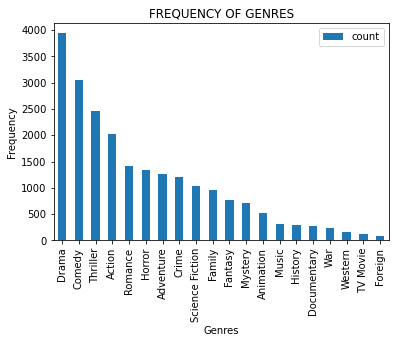

In [53]:
barchart(df=sorted_genre, x='Genres', y='Frequency', title='FREQUENCY OF GENRES')

## Inference: Above bar chart shows the 4 most produced genres of movies  produced over the 56 years given are Drama, Thriller, Comedy and Action

# Research Question 8: (Which genres are most popular per year from year to year?)

In [54]:
# tmdb_trim is a dataframe already sorted by popularity
popular_trim = tmdb_trim
popular_trim.popularity.unique()

array([32.985763, 28.419936, 14.311205, ...,  0.162767,  0.139647,
        0.070127])

In [55]:
# checking for the average value of popularity to thrim out those less than average
popular_trim.popularity.mean()

0.740476221608561

##### Since there are popularity values that have really low popularity value. Thus, there is a need to prune out popularity values that are lower than the mean value.

In [56]:
popular_refined = popular_trim[(popular_trim.popularity > 0.75)]

In [57]:
popular_refined.head(10)

,popularity,release_year,original_title,Action,Adventure,Science Fiction,Western,Drama,History,Thriller,...,Mystery,War,Animation,Crime,Romance,Horror,Music,Documentary,TV Movie,Foreign
0,32.985763,2015,Jurassic World,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.419936,2015,Mad Max: Fury Road,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.311205,2014,Guardians of the Galaxy,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.971027,2014,Captain America: The Winter Soldier,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.037933,1977,Star Wars,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11.422751,2014,John Wick,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11.173104,2015,Star Wars: The Force Awakens,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.432768,2009,Avatar,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.363643,2010,Inception,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.335014,2015,Furious 7,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#extract out the most popular movies per year
extract=popular_refined.groupby(by='release_year').popularity.max()

In [59]:
# putting the extract series into dataframe for easy merging
extract_df= extract.to_frame().reset_index()

In [60]:
# extracting out new frame from previous by inner join.
popular_per_year = pd.merge(popular_refined,extract_df)

In [61]:
#sorting out to know the  most popular movie per year.
popular_per_year.sort_values(by=['release_year','popularity'],ascending=False).head(10)

,popularity,release_year,original_title,Action,Adventure,Science Fiction,Western,Drama,History,Thriller,...,Mystery,War,Animation,Crime,Romance,Horror,Music,Documentary,TV Movie,Foreign
0,32.985763,2015,Jurassic World,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,24.949134,2014,Interstellar,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,6.112766,2013,Frozen,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.637767,2012,The Avengers,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.959228,2011,Captain America: The First Avenger,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.363643,2010,Inception,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.432768,2009,Avatar,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.466668,2008,The Dark Knight,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
12,4.965391,2007,Pirates of the Caribbean: At World's End,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5.838503,2006,Underworld: Evolution,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#drawing a graph of the number of genres per popularity per year
ppy = popular_per_year[popular_per_year.columns.difference
                 (['popularity','release_year','original_title'])].count().to_frame(name='count')

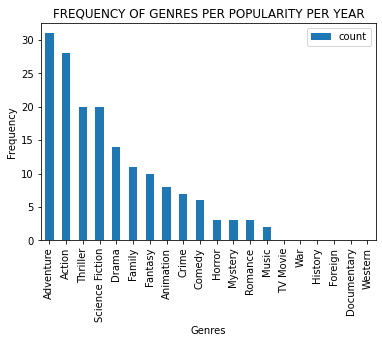

In [63]:
barchart(df=ppy, x='Genres', y='Frequency', title='FREQUENCY OF GENRES PER POPULARITY PER YEAR')

## Inference 8 = The commonest genre in most popular movies per year for the past 56 years are ADVENTURE and ACTION genres

# Research Question 9 (Which genres are most rated genres of movies produced over the 56 years given in data?)

In [64]:
# extracting highest rated movies by merging dataframe with genre splitted into columns 
# and dataframe with top 100 rated movies
rated_extract= pd.merge(high_rating, popular_trim)
rated_genre = rated_extract[rated_extract.columns.difference
                 (['popularity','release_year','original_title'])].count().to_frame(name='count')

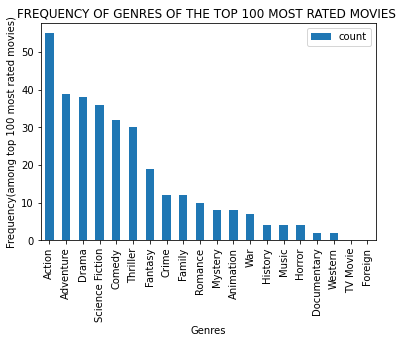

In [65]:
barchart(df=rated_genre, x='Genres', y='Frequency(among top 100 most rated movies)', 
         title='FREQUENCY OF GENRES OF THE TOP 100 MOST RATED MOVIES ')

## INFERENCE 9: above chart  shows the descending order of genres according to their ratings over the 56 years  in data.
* DRAMA,THRILLER and ACTION genres are the top 3 most rated while 
* FOREIGN AND DOCUMENTARY are the least COMMONLY rated high

---------------

# Research Question 10 (What kinds of properties are associated with movies that have high revenues?)
* the genres with high revenue 
* checking the relationship betwenen profit, budget and revenue
* checking for the relationship between high revenue and high_ratings
* checking for the relationship between popularity and revenue
* checking for the aaverage budget and revenue
* THE PRODUCTION COMPANY WITH THE HIGH YIELDING MOVIES
* DIRECTORS PROLIFIC IN DIRECTING THE HIGHEST YIELDING MOVIES
* TREND OF TOTAL REVENUE OVER THE YEARS

In [66]:
# 10a. the genres with high revenue
# extract 100 most sold movies from tmdb1 dataframe.
top_sold100 = sold.head(100)
high_yield = pd.merge(top_sold100,popular_trim)
high_yieldall=high_yield.sort_values(by='revenue_adj',ascending=False)
y=high_yieldall[['Action', 'Adventure', 'Science Fiction', 'Western', 'Drama',
       'History', 'Thriller', 'Family', 'Fantasy', 'Comedy', 'Mystery',
       'War', 'Animation', 'Crime', 'Romance', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign']].count().sort_values()

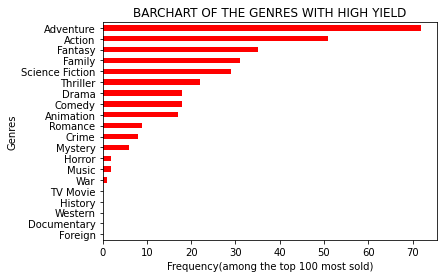

In [67]:
#plotting a barchart  to show genres of the most sold movies
y.plot(kind='barh',color='red')
plt.title(label = 'BARCHART OF THE GENRES WITH HIGH YIELD')
plt.ylabel('Genres')
plt.xlabel('Frequency(among the top 100 most sold)')
plt.show()

## INFERENCE 10a: the above barplot shows the genres among the top 100 most revenue yielding movies

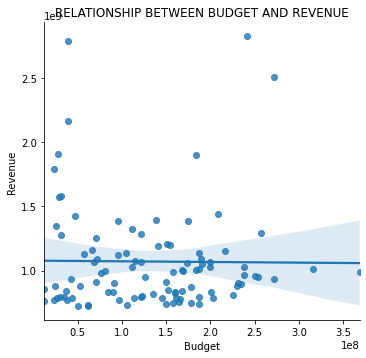

In [68]:
# checking the relationship betwenen budget and revenue
sns.lmplot(x='budget_adj', y='revenue_adj',data=top_sold100)
plt.title(label = 'RELATIONSHIP BETWEEN BUDGET AND REVENUE')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [69]:
top_sold100[['budget_adj','revenue_adj', 'Profit']].corr()

,budget_adj,revenue_adj,Profit
budget_adj,1.000000,-0.009987,-0.198209
revenue_adj,-0.009987,1.000000,0.982090
Profit,-0.198209,0.982090,1.000000


## INTERFERENCE 10b: above scatterplot shows there is no correlation between the budget and revenue at -1%. i.e expensive movies does not necessarily give high yield 

In [70]:
# extract top 100 ratings and high revenue
high_rating1000= rating.head(1000)
rev_ratings = pd.merge(sold_1000,high_rating1000)


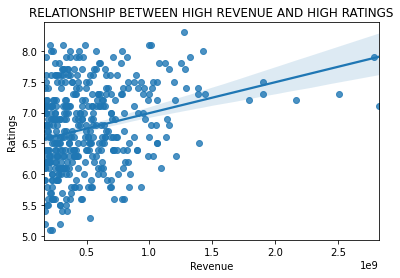

In [71]:
# 10c. checking for the relationship between high revenue and high_ratings
sns.regplot(data=rev_ratings, x='revenue_adj', y='vote_average')
plt.title(label = 'RELATIONSHIP BETWEEN HIGH REVENUE AND HIGH RATINGS')
plt.ylabel('Ratings')
plt.xlabel('Revenue')
plt.show()

In [72]:
rev_ratings[['revenue_adj','vote_average']].corr()

,revenue_adj,vote_average
revenue_adj,1.000000,0.269753
vote_average,0.269753,1.000000


###  INFERENCE 10c: the correlation between the ratings of the movies and the is weakly positive i.e high rating does not necessarily mean high revenue and vice  versa

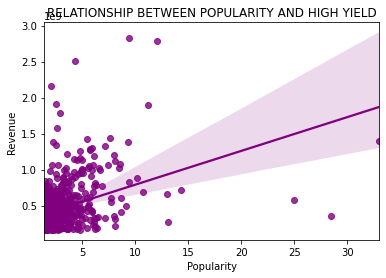

In [73]:
# 10d. checking for the relationship between popularity and revenur
#extract top 1000 most popular and highest yielding movies
pop_yield= pd.merge(sold_1000,top_pop1000)
sns.regplot(data=pop_yield,x='popularity',y='revenue_adj', color='purple')
plt.title(label = 'RELATIONSHIP BETWEEN POPULARITY AND HIGH YIELD')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

In [74]:
pop_yield[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.000000,0.467552
revenue,0.467552,1.000000


### INFERENCE 10d: the relationship between high yielding and revenue is positive(47%). i.e there is a tendency for a popular movies to be popular.

In [75]:
# 10e checking for the aaverage budget and revenue
sold.head(50)[['revenue_adj','budget_adj']].mean()

revenue_adj    1.317835e+09
budget_adj     1.392524e+08
dtype: float64

### INFERENCE 10e: Among top 50 most sold movies, the average budget is 139 million dollars while the expected average revenue is 1.3 billion trillion dollars 

In [76]:
#10F. THE PRODUCTION COMPANY WITH THE HIGH YIELDING MOVIES
#checking for the unique values of production compnies for movies in dataframe
tmdb1.production_companies.unique()

array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ..., 'Mosfilm', 'Benedict Pictures Corp.', 'Norm-Iris'],
      dtype=object)

In [77]:
#extracting companies out of the grouped observations in  
#column production companies in the dataframe withthe top revenue returns called sold.
companies ={}
most_sold_100 = sold.head(100).production_companies
for x in most_sold_100:
    for company in x.split('|'):
        if company in companies:
            companies[company] += 1 
        else: companies[company] = 1


[]

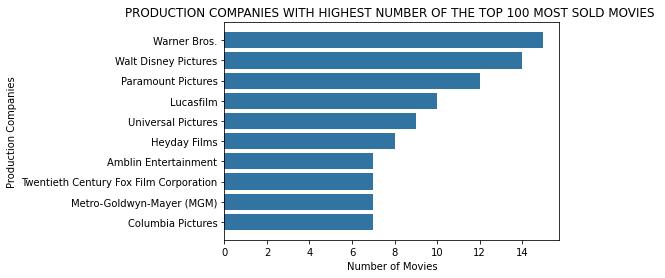

In [78]:
#drawing  a graph of production companies with highest number of  top 100 returns
base_color= sns.color_palette()[0]
comp = pd.DataFrame.from_dict(companies,orient='index').reset_index()
comp.rename(columns={'index':'companies', 0:'numbers_of_movies'}, inplace=True)
top10_revenue_companies= comp.sort_values(by='numbers_of_movies',ascending=False).head(10)
sns.barplot(data=top10_revenue_companies, x='numbers_of_movies', y='companies', color=base_color)
plt.title(label = 'PRODUCTION COMPANIES WITH HIGHEST NUMBER OF THE TOP 100 MOST SOLD MOVIES ')
plt.ylabel('Production Companies')
plt.xlabel('Number of Movies')
plt.plot()

## INFERENCE 10F: 
### Above bar chart show the top 10 movie companies involved in  the production of  high revenue yielding movies, among which companies like 'WALT DISNEY', 'WARNER BROS' AND PARAMOUNT PICTURE rank the topmost     

------------

## 10.G. DIRECTORS PROLIFIC IN DIRECTING THE HIGHEST YIELDING MOVIES
##### extract directors from the the top 100 high yielding  and use to show movie directors with hihest number of top sold movies

[]

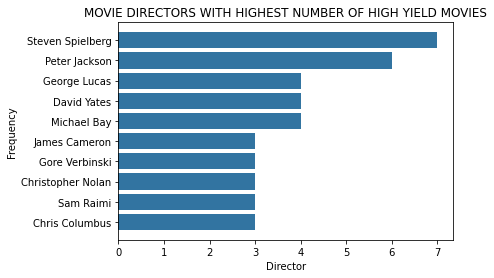

In [79]:
sns.countplot(y='director', data=top_sold100,order=top_sold100.director.value_counts().head(10).index,color=base_color)
plt.title(label = 'MOVIE DIRECTORS WITH HIGHEST NUMBER OF HIGH YIELD MOVIES')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.plot()

-----------

## INFERENCE 10G: 
### Above bar chart show the top 10 movie directors involved in  the production of  high revenue yielding movies, among which directors : STEVEN SPIELBERG AND PETER JACKSON directed most of the movies of the top 100 yielding movies     

[]

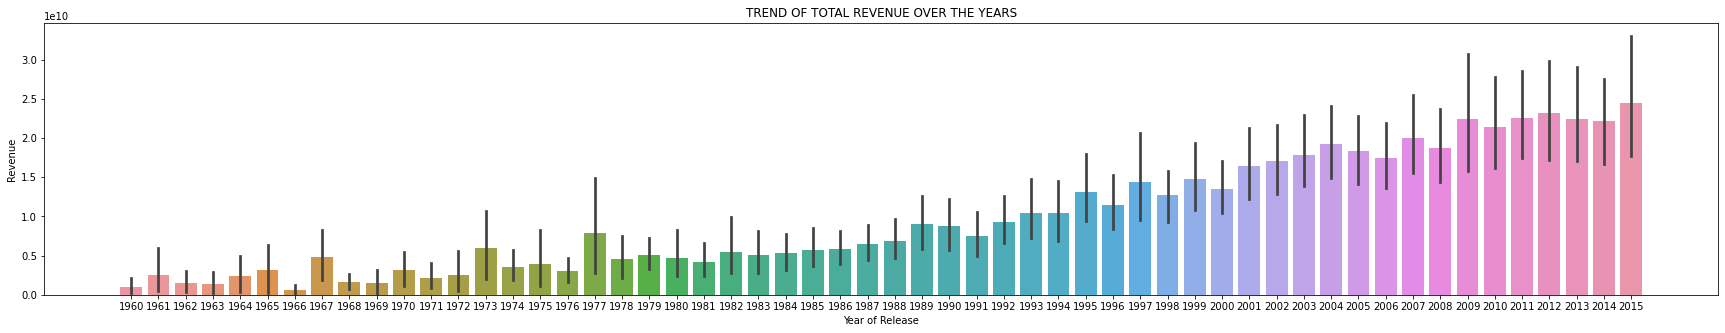

In [80]:
#10H TREND OF TOTAL REVENUE OVER THE YEARS
#extract years in which the is movies sold per year
fig, ax = plt.subplots(figsize= (30,5))
sns.barplot(data=tmdb1, x='release_year', 
            y='revenue_adj', estimator= sum)
plt.title(label = 'TREND OF TOTAL REVENUE OVER THE YEARS')
plt.xlabel('Year of Release')
plt.ylabel('Revenue')
plt.plot()

## INFERENCE 10H:
### Above bar graph shows that the revenue from movie industry increases graduually per decade 
​

# Research Question 11.  : Are there movies with High budget but low ratings)

In [81]:

print('Average budget for movies: {}'.format(tmdb1.budget_adj.mean()))
print('Average vote count for movies: {}'.format(tmdb1.vote_count.mean()))

Average budget for movies: 21248198.240958426
Average vote count for movies: 263.5716258198136


In [82]:
tmdb1[['vote_average','budget_adj']].corr()

,vote_average,budget_adj
vote_average,1.000000,0.101071
budget_adj,0.101071,1.000000


In [83]:

tmdb1[(tmdb1.vote_average< 5.0) & (tmdb1.vote_count>500) & (tmdb1.budget_adj>22000000)].shape

(6, 17)

## INFERENCE 11: 
### most of the movies produced by the companies with budget of over 22 million dollars has a rating more than 5 withat least 500 votes counts. There is however a low correlation between budget and ratings.

<a id='conclusions'></a>
## Conclusions


A.	TOP 10 MOVIES WITH HIGH BUDGET
1.	The Warrior's Way
2.	Pirates of the Caribbean: On Stranger Tides
3.	Pirates of the Caribbean: At World's End
4.	Superman Returns
5.	Titanic
6.	Spider-Man 3
7.	Tangled
8.	Avengers: Age of Ultron
9.	Harry Potter and the Half-Blood Prince
10.	Waterworld


B.	TOP 10 HIGH YIELD MOVIES
1. Avatar
2. Star Wars
3. Titanic
4. The Exorcist
5. Jaws
6. Star Wars: The Force Awakens
7. E.T. the Extra-Terrestrial
8. The Net
9. One Hundred and One Dalmatians
10. The Avengers

C.	Top 10 most profitable movies
1.	Star Wars: **STAR WARS WAS MORE PROFITABLE THAN AVATAR BECAUSE THOUGH THE REVENUE WAS HIGH, THE BUDGET WAS MORE THAN THAT OF STAR WARS**
2.	Avatar
3.	Titanic
4.	The Exorcist
5.	Jaws
6.	E.T. the Extra-Terrestrial
7.	Star Wars: The Force Awakens
8.	The Net
9.	One Hundred and One Dalmatians
10.	The Empire Strikes Back

D.	TOP 10 RATED MOVIES
1.	The Shawshank Redemption
2.	The Godfather
3.	Whiplash
4.	Schindler's List
5.	Forrest Gump
6.	Pulp Fiction
7.	The Dark Knight
8.	The Godfather: Part II
9.	Fight Club
10.	The Green Mile

E.	The 4 most produced genres of movies  produced over the 56 years given are Drama, Thriller, Comedy and Action.

F.	The commonest genre in most popular movies per year for the past 56 years are ADVENTURE and ACTION, THRILLER AND SCI-FI


G.	DRAMA, THRILLER and ACTION genres are the top 3 most rated while


H.	FOREIGN AND DOCUMENTARY are the least COMMONLY rated genre


I.	FEATURES OF HIGH REVENUE MOVIES
* i.	Adventure,action and fantasy are the commonest
* ii.	No relationship between high revenue,
* iii.	There is weak positive correlation between ratings an revenue.  High ratings doesnot necessarily mean high revenue
* iv.	There is a 47% positive correlation between high revenue and popularity i.e popularity increases the chance of having high returns on movie produced
* v.	'WALT DISNEY', 'WARNER BROS' AND PARAMOUNT PICTURE rank the topmost producer of high yielding movies


J.	The 4 most produced genres of movies produced over the 56 years given are Drama, Comedy, Thriller and Action. However, the 4 most common genres among the most popular movies are Adventure, Action, Thriller and Science Fiction respectively.


K. 0                             
1. Jurassic World
2. Mad Max: Fury Road
3. Interstellar
4. Guardians of the Galaxy
5. Insurgent
6. Captain America: The Winter Soldier
7. Star Wars
8. John Wick
9. Star Wars: The Force Awakens






## Limitations

* The genres are not separated into columns which made it difficult slice through it
* Presence of null values which I had to drop
* Presence of ratings determined by few number of votes which could cause bias

### REFERENCES

1.	https://stackoverflow.com/questions/58021749/allocate-values-from-different-options-pandas
2.	https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count/46624802#46624802
3.	data-to-viz.com
4.	https://seaborn.pydata.org/tutorial/aesthetics.html
5.	https://www.w3schools.com/python/ref_list_sort.asp
6.	https://stackoverflow.com/questions/32459325/python-pandas-dataframe-select-row-by-max-value-in-group
7.	https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging
8.	https://stackoverflow.com/questions/65630649/easier-way-for-distributing-elements-of-list-to-a-new-pandas-dataframe-column-in
9.	https://stackoverflow.com/questions/58021749/allocate-values-from-different-options-pandas
10.	https://www.youtube.com/watch?v=8U5h3EJuu8M&list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j&index=15
11.	https://byjus.com/maths/correlation/
12.	https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

